In [1]:
import pandas as pd

def clean_and_preprocess_data(file_path, null_threshold=0.5):
    # Read the CSV file into a Pandas DataFrame
    df = pd.read_csv(file_path)
    print(df.head())
    # Data cleaning and preprocessing steps
    # -------------------------------------
    # Drop columns with null values above the specified threshold
    num_rows = len(df)
    drop_columns = [col for col in df.columns if df[col].isnull().sum() / num_rows > null_threshold]
    df.drop(columns=drop_columns, inplace=True)

    # Fill missing numerical values with the mean
    numerical_columns = df.select_dtypes(include='number').columns
    for col in numerical_columns:
        df[col].fillna(df[col].mean(), inplace=True)

    # Fill missing categorical values with the mode
    categorical_columns = df.select_dtypes(include='object').columns
    for col in categorical_columns:
        df[col].fillna(df[col].mode().iloc[0], inplace=True)

    # Any other data cleaning and preprocessing steps can be performed here as needed

    # Save the cleaned and preprocessed DataFrame back to a new CSV file if desired
    df.to_csv("cleaned_bank_data.csv", index=False)

    return df

if __name__ == "__main__":
    file_path = "bank_data.csv"  # Update this with the actual path to your CSV file
    null_threshold = 0.5  # Specify the threshold for dropping columns (e.g., 0.5 means >50% nulls)
    cleaned_data = clean_and_preprocess_data(file_path, null_threshold)

    # Optionally, you can print the first few rows of the cleaned DataFrame
    print(cleaned_data.head(20))


     id  expected_recovery_amount  actual_recovery_amount recovery_strategy  \
0  2030                       194                 263.540  Level 0 Recovery   
1  1150                       486                 416.090  Level 0 Recovery   
2   380                       527                 429.350  Level 0 Recovery   
3  1838                       536                 296.990  Level 0 Recovery   
4  1995                       541                 346.385  Level 0 Recovery   

   age     sex  
0   19    Male  
1   25  Female  
2   27    Male  
3   25    Male  
4   34    Male  
      id  expected_recovery_amount  actual_recovery_amount recovery_strategy  \
0   2030                       194                 263.540  Level 0 Recovery   
1   1150                       486                 416.090  Level 0 Recovery   
2    380                       527                 429.350  Level 0 Recovery   
3   1838                       536                 296.990  Level 0 Recovery   
4   1995               

In [5]:
cleaned_data.head(30)

,id,expected_recovery_amount,actual_recovery_amount,recovery_strategy,age,sex
0,2030,194,263.540,Level 0 Recovery,19,Male
1,1150,486,416.090,Level 0 Recovery,25,Female
2,380,527,429.350,Level 0 Recovery,27,Male
3,1838,536,296.990,Level 0 Recovery,25,Male
4,1995,541,346.385,Level 0 Recovery,34,Male
5,731,548,520.710,Level 0 Recovery,35,Male
6,221,549,221.585,Level 0 Recovery,33,Male
7,1932,560,373.720,Level 0 Recovery,19,Female
8,1828,562,201.865,Level 0 Recovery,22,Female
9,2001,565,504.885,Level 0 Recovery,27,Male


In [5]:
import pandas as pd
from sklearn.linear_model import LinearRegression

def regression_discontinuity_analysis(df, threshold_col):
    # Create binary variables for each threshold
    thresholds = [1000, 2000, 3000]  # Update with your specific threshold values
    for threshold in thresholds:
        df[f'above_{threshold}'] = (df[threshold_col] >= threshold).astype(int)

    # Perform regression discontinuity analysis using scikit-learn
    X = df[[f'above_{threshold}' for threshold in thresholds]]  # Binary variables as features
    y = df['actual_recovery_amount']  # Dependent variable (amount recovered)

    model = LinearRegression()
    model.fit(X, y)

    # Print regression results
    print("Regression Coefficients:")
    print(model.coef_)
    print("Intercept:", model.intercept_)

    # Calculate average difference in amount recovered between higher and lower strategy levels
    average_difference = df[df[threshold_col].isin(thresholds)].groupby(f'above_{threshold}')['actual_recovery_amount'].mean().diff().iloc[-1]

    # Compare average difference with additional cost ($50 per customer)
    if average_difference > 50:
        print("There is a significant jump (discontinuity) in the amount recovered at the higher strategy level.")
    else:
        print("There is no significant jump (discontinuity) in the amount recovered at the higher strategy level.")

if __name__ == "__main__":
    file_path = "cleaned_bank_data.csv"  # Update this with the actual path to your CSV file
    df = pd.read_csv(file_path)

    # Replace 'expected_recovery_amount' with the appropriate column name in your dataset
    threshold_column = 'expected_recovery_amount'

    regression_discontinuity_analysis(df, threshold_column)



Regression Coefficients:
[ 782.8255562  1615.49697975 5876.855404  ]
Intercept: 518.5928048780665
There is no significant jump (discontinuity) in the amount recovered at the higher strategy level.


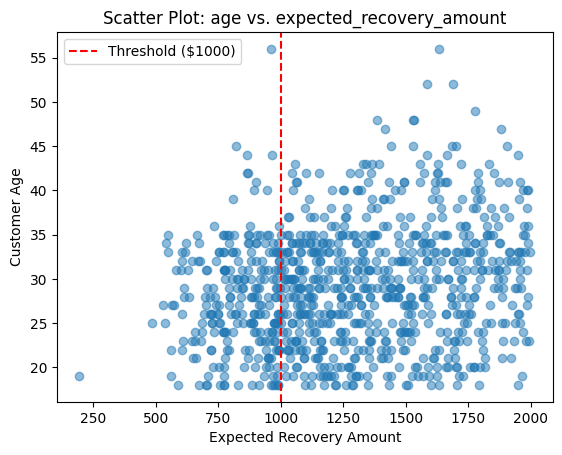

In [6]:

import matplotlib.pyplot as plt

def scatter_plot_age_vs_recovery_amount(df, threshold_col, age_col, lower_bound, upper_bound):
    # Filter the data for the specified range of Expected Recovery Amounts
    df_range = df[(df[threshold_col] >= lower_bound) & (df[threshold_col] <= upper_bound)]

    # Create the scatter plot
    plt.scatter(df_range[threshold_col], df_range[age_col], alpha=0.5)
    plt.xlabel("Expected Recovery Amount")
    plt.ylabel("Customer Age")
    plt.title(f"Scatter Plot: {age_col} vs. {threshold_col}")
    plt.axvline(x=1000, color='red', linestyle='--', label='Threshold ($1000)')
    plt.legend()
    plt.show()

if __name__ == "__main__":
    file_path = "cleaned_bank_data.csv"  # Update this with the actual path to your CSV file
    df = pd.read_csv(file_path)

    # Replace 'expected_recovery_amount' and 'age' with the appropriate column names in your dataset
    threshold_column = 'expected_recovery_amount'
    age_column = 'age'

    # Set the range for Expected Recovery Amount to focus on (Level 0 and Level 1)
    lower_bound = 0
    upper_bound = 2000

    scatter_plot_age_vs_recovery_amount(df, threshold_column, age_column, lower_bound, upper_bound)


In [7]:
#stat analysis of age vs expected ra

import scipy.stats as stats

def test_average_age(df, threshold_col, age_col, lower_bound, upper_bound):
    # Filter the data for the specified range of Expected Recovery Amounts
    df_range = df[(df[threshold_col] >= lower_bound) & (df[threshold_col] <= upper_bound)]

    # Split the data into two groups based on the threshold
    group_below = df_range[df_range[threshold_col] < 1000][age_col]
    group_above = df_range[df_range[threshold_col] >= 1000][age_col]

    # Perform t-test to compare the average age between the two groups
    t_stat, p_value = stats.ttest_ind(group_below, group_above)

    # Print the results
    print("Statistical Test: Average Age vs. Expected Recovery Amount")
    print("Null Hypothesis (H0): There is no significant difference in the average age between the two groups.")
    print("p-value:", p_value)

    # Determine if the null hypothesis is rejected based on the significance level (e.g., alpha = 0.05)
    alpha = 0.05
    if p_value < alpha:
        print("Result: The null hypothesis is rejected. There is a significant difference in the average age.")
    else:
        print("Result: The null hypothesis is not rejected. There is no significant difference in the average age.")

if __name__ == "__main__":
    file_path = "cleaned_bank_data.csv"  # Update this with the actual path to your CSV file
    df = pd.read_csv(file_path)

    # Replace 'expected_recovery_amount' and 'age' with the appropriate column names in your dataset
    threshold_column = 'expected_recovery_amount'
    age_column = 'age'

    # Set the range for Expected Recovery Amount to focus on (around the threshold)
    lower_bound = 900
    upper_bound = 1100

    test_average_age(df, threshold_column, age_column, lower_bound, upper_bound)


Statistical Test: Average Age vs. Expected Recovery Amount
Null Hypothesis (H0): There is no significant difference in the average age between the two groups.
p-value: 0.10808708027365424
Result: The null hypothesis is not rejected. There is no significant difference in the average age.


In [8]:
#stat analysis of sex vs expected ra
import pandas as pd
import scipy.stats as stats

def test_percentage_male(df, threshold_col, sex_col, lower_bound, upper_bound):
    # Filter the data for the specified range of Expected Recovery Amounts
    df_range = df[(df[threshold_col] >= lower_bound) & (df[threshold_col] <= upper_bound)]

    # Create contingency table for chi-square test
    contingency_table = pd.crosstab(df_range[threshold_col] >= 1000, df_range[sex_col])

    # Perform chi-square test to compare the percentage of male customers between the two groups
    chi2_stat, p_value, _, _ = stats.chi2_contingency(contingency_table)

    # Print the results
    print("Statistical Test: Sex vs. Expected Recovery Amount")
    print("Null Hypothesis (H0): There is no significant difference in the percentage of male customers between the two groups.")
    print("p-value:", p_value)

    # Determine if the null hypothesis is rejected based on the significance level (e.g., alpha = 0.05)
    alpha = 0.05
    if p_value < alpha:
        print("Result: The null hypothesis is rejected. There is a significant difference in the percentage of male customers.")
    else:
        print("Result: The null hypothesis is not rejected. There is no significant difference in the percentage of male customers.")

if __name__ == "__main__":
    file_path = "cleaned_bank_data.csv"  # Update this with the actual path to your CSV file
    df = pd.read_csv(file_path)

    # Replace 'expected_recovery_amount' and 'sex' with the appropriate column names in your dataset
    threshold_column = 'expected_recovery_amount'
    sex_column = 'sex'

    # Set the range for Expected Recovery Amount to focus on (around the threshold)
    lower_bound = 900
    upper_bound = 1100

    test_percentage_male(df, threshold_column, sex_column, lower_bound, upper_bound)


Statistical Test: Sex vs. Expected Recovery Amount
Null Hypothesis (H0): There is no significant difference in the percentage of male customers between the two groups.
p-value: 0.5585016756410321
Result: The null hypothesis is not rejected. There is no significant difference in the percentage of male customers.


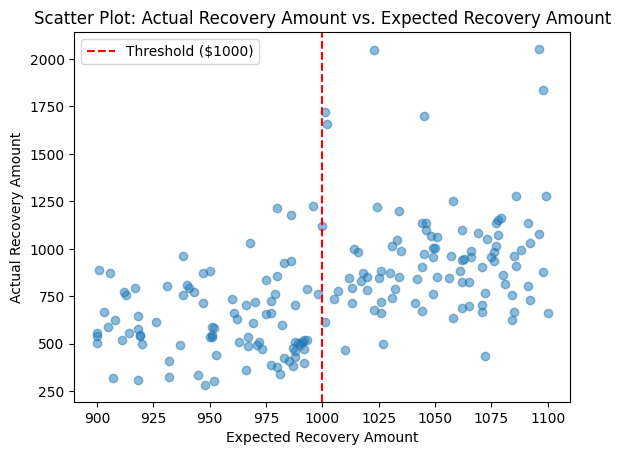

In [9]:
#exploratory data analysis on ara and era

def scatter_plot_actual_vs_expected_recovery(df, threshold_col, actual_col, lower_bound, upper_bound):
    # Filter the data for the specified range of Expected Recovery Amounts
    df_range = df[(df[threshold_col] >= lower_bound) & (df[threshold_col] <= upper_bound)]

    # Create the scatter plot
    plt.scatter(df_range[threshold_col], df_range[actual_col], alpha=0.5)
    plt.xlabel("Expected Recovery Amount")
    plt.ylabel("Actual Recovery Amount")
    plt.title(f"Scatter Plot: Actual Recovery Amount vs. Expected Recovery Amount")
    plt.axvline(x=1000, color='red', linestyle='--', label='Threshold ($1000)')
    plt.legend()
    plt.show()

if __name__ == "__main__":
    file_path = "cleaned_bank_data.csv"  # Update this with the actual path to your CSV file
    df = pd.read_csv(file_path)

    # Replace 'expected_recovery_amount' and 'actual_recovery_amount' with the appropriate column names in your dataset
    threshold_column = 'expected_recovery_amount'
    actual_column = 'actual_recovery_amount'

    # Set the range for Expected Recovery Amount to focus on (around the threshold)
    lower_bound = 900
    upper_bound = 1100

    scatter_plot_actual_vs_expected_recovery(df, threshold_column, actual_column, lower_bound, upper_bound)


In [10]:
#Statistical analysis: recovery amount

def kruskal_wallis_test(df, threshold_col, actual_col, lower_bound, upper_bound):
    # Filter the data for the specified range of Expected Recovery Amounts
    df_range = df[(df[threshold_col] >= lower_bound) & (df[threshold_col] <= upper_bound)]

    # Split the data into two groups based on the threshold
    group_below = df_range[df_range[threshold_col] < 1000][actual_col]
    group_above = df_range[df_range[threshold_col] >= 1000][actual_col]

    # Perform Kruskal-Wallis test to compare the actual recovery amount between the two groups
    stat, p_value = stats.kruskal(group_below, group_above)

    # Print the results
    print(f"Statistical Test: Kruskal-Wallis Test for {actual_col} vs. {threshold_col}")
    print(f"Null Hypothesis (H0): There is no significant difference in {actual_col} between the two groups.")
    print("p-value:", p_value)

    # Determine if the null hypothesis is rejected based on the significance level (e.g., alpha = 0.05)
    alpha = 0.05
    if p_value < alpha:
        print("Result: The null hypothesis is rejected. There is a significant difference in the actual recovery amount.")
    else:
        print("Result: The null hypothesis is not rejected. There is no significant difference in the actual recovery amount.")

if __name__ == "__main__":
    file_path = "cleaned_bank_data.csv"  # Update this with the actual path to your CSV file
    df = pd.read_csv(file_path)

    # Replace 'expected_recovery_amount' and 'actual_recovery_amount' with the appropriate column names in your dataset
    threshold_column = 'expected_recovery_amount'
    actual_column = 'actual_recovery_amount'

    # Set the range for Expected Recovery Amount to focus on (two different windows)
    lower_bound_1 = 900
    upper_bound_1 = 1100
    lower_bound_2 = 950
    upper_bound_2 = 1050

    kruskal_wallis_test(df, threshold_column, actual_column, lower_bound_1, upper_bound_1)
    kruskal_wallis_test(df, threshold_column, actual_column, lower_bound_2, upper_bound_2)


Statistical Test: Kruskal-Wallis Test for actual_recovery_amount vs. expected_recovery_amount
Null Hypothesis (H0): There is no significant difference in actual_recovery_amount between the two groups.
p-value: 1.4886212444250157e-16
Result: The null hypothesis is rejected. There is a significant difference in the actual recovery amount.
Statistical Test: Kruskal-Wallis Test for actual_recovery_amount vs. expected_recovery_amount
Null Hypothesis (H0): There is no significant difference in actual_recovery_amount between the two groups.
p-value: 5.77104323298489e-09
Result: The null hypothesis is rejected. There is a significant difference in the actual recovery amount.


Regression Coefficients:
Intercept: -1918.4549425253638
Coefficient: 2.695599847030075


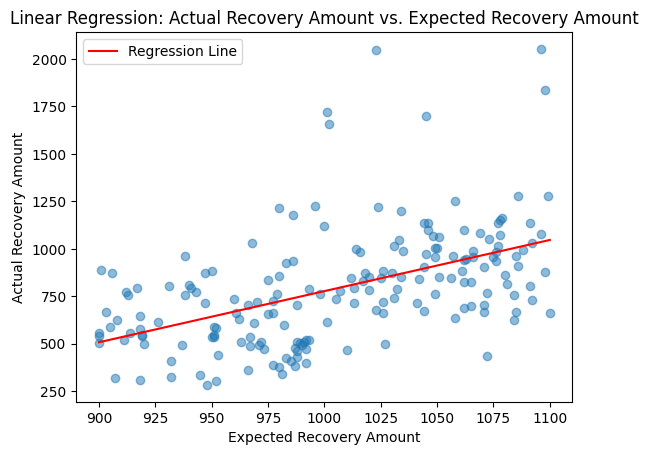

Regression Coefficients:
Intercept: -1918.4549425253638
Coefficient: 2.695599847030075


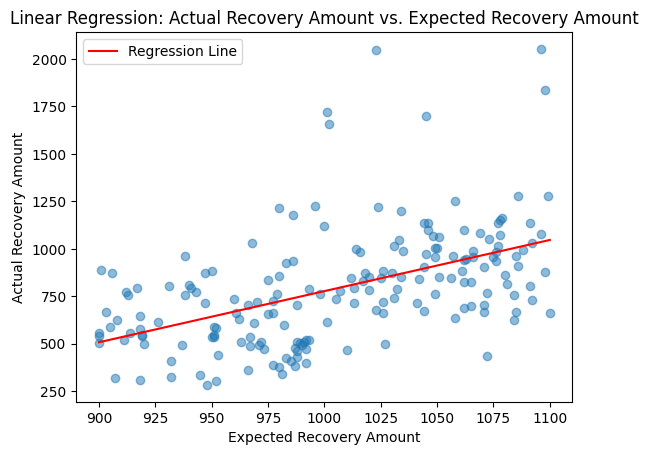

In [12]:
#Regression modeling: no threshold

def build_linear_regression_model(df, threshold_col, actual_col):
    # Filter the data for observations just above and just below the threshold
    df_range = df[(df[threshold_col] >= 900) & (df[threshold_col] <= 1100)]

    # Create the linear regression model
    X = df_range[threshold_col].values.reshape(-1, 1)
    y = df_range[actual_col].values.reshape(-1, 1)

    model = LinearRegression()
    model.fit(X, y)

    # Print the regression results
    print("Regression Coefficients:")
    print("Intercept:", model.intercept_[0])
    print("Coefficient:", model.coef_[0][0])

    # Plot the scatter plot with the regression line
    plt.scatter(X, y, alpha=0.5)
    plt.plot(X, model.predict(X), color='red', label='Regression Line')
    plt.xlabel("Expected Recovery Amount")
    plt.ylabel("Actual Recovery Amount")
    plt.title("Linear Regression: Actual Recovery Amount vs. Expected Recovery Amount")
    plt.legend()
    plt.show()

if __name__ == "__main__":
    file_path = "cleaned_bank_data.csv"  # Update this with the actual path to your CSV file
    df = pd.read_csv(file_path)

    # Replace 'expected_recovery_amount' and 'actual_recovery_amount' with the appropriate column names in your dataset
    threshold_column = 'expected_recovery_amount'
    actual_column = 'actual_recovery_amount'

    build_linear_regression_model(df, threshold_column, actual_column)


def build_linear_regression_model(df, threshold_col, actual_col):
    # Filter the data for observations just above and just below the threshold
    df_range = df[(df[threshold_col] >= 900) & (df[threshold_col] <= 1100)]

    # Create the linear regression model
    X = df_range[threshold_col].values.reshape(-1, 1)
    y = df_range[actual_col].values.reshape(-1, 1)

    model = LinearRegression()
    model.fit(X, y)

    # Print the regression results
    print("Regression Coefficients:")
    print("Intercept:", model.intercept_[0])
    print("Coefficient:", model.coef_[0][0])

    # Plot the scatter plot with the regression line
    plt.scatter(X, y, alpha=0.5)
    plt.plot(X, model.predict(X), color='red', label='Regression Line')
    plt.xlabel("Expected Recovery Amount")
    plt.ylabel("Actual Recovery Amount")
    plt.title("Linear Regression: Actual Recovery Amount vs. Expected Recovery Amount")
    plt.legend()
    plt.show()

if __name__ == "__main__":
    file_path = "cleaned_bank_data.csv"  # Update this with the actual path to your CSV file
    df = pd.read_csv(file_path)

    # Replace 'expected_recovery_amount' and 'actual_recovery_amount' with the appropriate column names in your dataset
    threshold_column = 'expected_recovery_amount'
    actual_column = 'actual_recovery_amount'

    build_linear_regression_model(df, threshold_column, actual_column)


In [13]:
#Regression modeling: adding true threshold

def build_second_regression_model(df, threshold_col, actual_col):
    # Add binary indicator for true threshold
    df['above_threshold'] = (df[threshold_col] >= 1000).astype(int)

    # Create the second regression model with the binary indicator
    X = df[[threshold_col, 'above_threshold']]
    y = df[actual_col]

    model = LinearRegression()
    model.fit(X, y)

    # Print the regression results
    print("Regression Coefficients:")
    print("Intercept:", model.intercept_)
    print("Coefficient for Expected Recovery Amount:", model.coef_[0])
    print("Coefficient for Above Threshold Indicator:", model.coef_[1])

if __name__ == "__main__":
    file_path = "cleaned_bank_data.csv"  # Update this with the actual path to your CSV file
    df = pd.read_csv(file_path)

    # Replace 'expected_recovery_amount' and 'actual_recovery_amount' with the appropriate column names in your dataset
    threshold_column = 'expected_recovery_amount'
    actual_column = 'actual_recovery_amount'

    build_second_regression_model(df, threshold_column, actual_column)


Regression Coefficients:
Intercept: -1202.8426349477081
Coefficient for Expected Recovery Amount: 2.0874421083623087
Coefficient for Above Threshold Indicator: -641.2858495462172


In [14]:
#Regression modeling: adjusting the window
def build_regression_model_with_adjusted_window(df, threshold_col, actual_col, lower_bound, upper_bound):
    # Add binary indicator for true threshold within the adjusted window
    df['above_threshold'] = (df[threshold_col] >= 1000).astype(int)

    # Filter the data for the specified range of Expected Recovery Amounts
    df_range = df[(df[threshold_col] >= lower_bound) & (df[threshold_col] <= upper_bound)]

    # Create the regression model with the binary indicator
    X = df_range[[threshold_col, 'above_threshold']]
    y = df_range[actual_col]

    model = LinearRegression()
    model.fit(X, y)

    # Print the regression results
    print(f"Regression Results for Expected Recovery Amount between ${lower_bound} and ${upper_bound}:")
    print("Regression Coefficients:")
    print("Intercept:", model.intercept_)
    print("Coefficient for Expected Recovery Amount:", model.coef_[0])
    print("Coefficient for Above Threshold Indicator:", model.coef_[1])

if __name__ == "__main__":
    file_path = "cleaned_bank_data.csv"  # Update this with the actual path to your CSV file
    df = pd.read_csv(file_path)

    # Replace 'expected_recovery_amount' and 'actual_recovery_amount' with the appropriate column names in your dataset
    threshold_column = 'expected_recovery_amount'
    actual_column = 'actual_recovery_amount'

    # Set the range for Expected Recovery Amount to focus on (adjusted window)
    lower_bound = 950
    upper_bound = 1050

    build_regression_model_with_adjusted_window(df, threshold_column, actual_column, lower_bound, upper_bound)


Regression Results for Expected Recovery Amount between $950 and $1050:
Regression Coefficients:
Intercept: -310.8224922873212
Coefficient for Expected Recovery Amount: 0.9510137916123865
Coefficient for Above Threshold Indicator: 285.5159796653841
